## Dependencies

In [2]:
import time
import pickle
import numpy as np
import pandas as pd
import metric_learn
from matplotlib import style
from collections import Counter
import matplotlib.pyplot as plt

style.use('ggplot')

## Embeddings summary

In [42]:
## Embedding created from type of data (binary or normalized) 
type_dict ={'b':'Binary', 'n' : 'Normalized'}
emb_type = 'n' # b: binary; n: normalized 
emb_dim = 197 # emb dimension 197 or 99

## Import the embeddings
path = 'data/Final/embeddings_{}_{}.npy'.format(emb_dim, emb_type)
emb = np.load(path)

print('{} embeddings loaded'.format(type_dict[emb_type]))
print("Embeddings are of the shape {}".format(emb.shape))
print("Column {} is the labels corresponding to each embedding".format(emb.shape[1]))

Normalized embeddings loaded
Embeddings are of the shape (70000, 197)
Column 197 is the labels corresponding to each embedding


# Vanilla KNN on Embeddings

In [25]:
"""
## To-Do
- Try the same on the only the MNIST datasets

- Decide on k values
- Calculate distance of each test instance with database and append to list
- Sort in descending order
- Pick the first 'k' values and assign test emb to majority clas
- Calculate the error

"""
def eucl_dist(instance, dataset):
    
    temp_inst = instance.reshape(1,-1)
    #temp_inst = temp_inst.repeat(len(dataset), axis=0)
    eucl_dist = np.linalg.norm((temp_inst - dataset[:,:-1]), axis=1)
    eucl_dist_sorted = [(eucl_dist[i], dataset[i,-1]) for i in range(len(dataset))]
    eucl_dist_sorted.sort()
    
    return eucl_dist_sorted

k_test = 200
emb_train = emb[:60000]
emb_test = emb[60000:]

predictions = dict()
time_list = list()

for k in range(1,k_test+1) : predictions[k] = list()

start_time = time.time()

for n,test_inst in enumerate(emb_test):
   
    
    instance = test_inst[:-1] # remove the label
    temp_dist_idx = eucl_dist(instance, emb_train) # dataset = emb_train 
    
    for k in range(1,k_test+1):
    
        ## Choose first k elements from sorted list 'temp_dist_idx'
        temp_first_k = temp_dist_idx[:k]
        temp_labels = [digit[1] for digit in temp_first_k]

        ## Pick label that has majority count and append to prediction list
        temp_list = [temp_labels.count(i) for i in temp_labels]
        predictions[k].append(temp_labels[temp_list.index(max(temp_list))])
        
    time_list.append(round(time.time() - start_time,3))
    print(n, round(time.time() - start_time,3))
    
## Pickling predictions and time values
path = "data/Final/"
with open(path + "predictions_knn_{}_{}".format(emb_dim,emb_type) + '.pkl', 'wb') as f:
    pickle.dump(predictions, f, pickle.HIGHEST_PROTOCOL)
with open(path + "time_knn_{}_{}".format(emb_dim,emb_type) + '.pkl', 'wb') as f:
    pickle.dump(time_list, f, pickle.HIGHEST_PROTOCOL)

0 0.305
1 0.534
2 1.145
3 1.369
4 1.654
5 1.952
6 2.177
7 2.444
8 2.7
9 2.946
10 3.189
11 3.456
12 3.709
13 3.941
14 4.204
15 4.461
16 4.692
17 4.978
18 5.236
19 5.501
20 5.806
21 6.021
22 6.274
23 6.49
24 6.748
25 6.968
26 7.314
27 8.072
28 8.537
29 9.107
30 9.362
31 9.661
32 9.891
33 10.181
34 10.498
35 10.744
36 11.248
37 11.474
38 11.845
39 12.098
40 12.322
41 12.555
42 12.789
43 13.012
44 13.242
45 13.723
46 14.4
47 14.627
48 14.88
49 15.426
50 15.717
51 15.954
52 16.2
53 16.438
54 16.725
55 16.993
56 17.251
57 17.509
58 17.776
59 18.01
60 18.274
61 18.522
62 18.773
63 19.02
64 19.308
65 19.576
66 19.824
67 20.074
68 20.321
69 20.575
70 20.833
71 21.071
72 21.337
73 21.574
74 21.8
75 22.052
76 22.283
77 22.557
78 22.864
79 23.426
80 23.679
81 23.913
82 24.196
83 24.459
84 24.703
85 24.939
86 25.17
87 25.43
88 25.663
89 25.886
90 26.123
91 26.366
92 26.614
93 27.167
94 27.75
95 28.028
96 28.699
97 28.97
98 29.198
99 29.489
100 29.724
101 29.961
102 30.496
103 30.831
104 31.495
105 

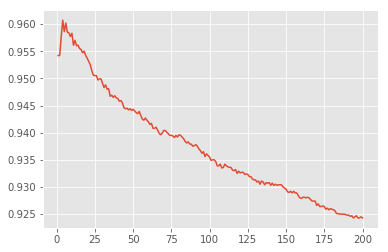

In [26]:
"""
## Load prediciton list 
with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f) """

## Calculate accuracy 
accuracy = list()
for k in range(1,k_test+1):
    sim_pred = sum(predictions[k] == emb_test[:,-1])
    accuracy.append((sim_pred/len(emb_test),k))
    
## Plotting accuracy (y_axis) vs K value (x_axis) curve
acc_k = [val[1] for val in accuracy]
acc_val = [val[0] for val in accuracy]

plt.plot(acc_k, acc_val)
plt.show()

In [27]:
idx = round(np.sqrt(60000/2)) # for k = sqrt(n/2)
print("Accuracy at {} = {}".format(idx, accuracy[int(idx-1)][0]))

Accuracy at 173.0 = 0.9264


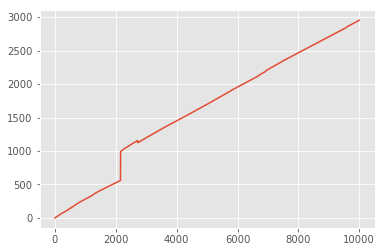

In [28]:
plt.plot(time_list)
plt.show()

In [ ]:
"""print(n)
    ## Calculate the distance of each test instance from train instances 
    test_inst = test_inst[:-1]
    test_inst = test_inst.reshape(1,-1)
    test_inst = test_inst.repeat(len(emb_train), axis=0)
    temp_dist = np.linalg.norm((test_inst - emb_train[:,:-1]), axis=1)

    ## Store distance and respective labels in tuples in a list
    temp_dist_idx = [(temp_dist[i],emb_train[i,-1]) for i in range(len(emb_train))]
    temp_dist_idx.sort()
"""

# CNN on Embeddings

**To use relevant indices, simply unpickle the list 'relevant_idx' and extract corresponding 
rows within the 'train_X' matrix**

In [30]:
def eucl_dist(instance, dataset):
    
    temp_inst = instance.reshape(1,-1)
    temp_inst = temp_inst.repeat(len(dataset), axis=0)
    eucl_dist = np.linalg.norm((temp_inst - dataset[:,:-2]), axis=1)
    eucl_dist_sorted = [(eucl_dist[i], dataset[i,-2]) for i in range(len(dataset))]
    eucl_dist_sorted.sort()
    
    return eucl_dist_sorted


## Removing the Bayesian Error

In [33]:
"""
- Remove Baysean error
    - Create 2 subsets
    - Find 1NN of instances from subset 1 using subset 2
        - classify them : Delete wrongly classified instances
    -  Find 1NN of instances from subset 2 using subset 1
        - classify them : Delete wrongly classified instances
    - Repeat until stability 
"""

## Adding indices to the embeddings (to keep track of them)
track_idx = np.array([i for i in range(len(emb))]).reshape(-1,1)
emb = np.concatenate((emb, track_idx), axis = 1)

## Creating subsets for CNN algo
train_subset_1 = emb[:30000]
train_subset_2 = emb[30000:60000]
track_unwanted = list() # store irrelevant indices

stability = False
prev_len_subset_1 = len(train_subset_1)
prev_len_subset_2 = len(train_subset_2)

itr = 0
while not stability:
    
    itr += 1
    print(itr)
    
    temp_unwanted = list()
    
    for n_1,sub_1 in enumerate(train_subset_1):
        
        
        eucl_dist_sorted = eucl_dist(sub_1[:-2], train_subset_2)
    
        ## Choose first k elements from sorted list 'temp_dist_idx'
        temp_first_nn = eucl_dist_sorted[0]
        temp_label = temp_first_nn[1]

        ## Store indices in unwated list if class is wrong
        if temp_label != sub_1[-2]:
            temp_unwanted.append(n_1)
            track_unwanted.append(sub_1[-1])
            
    ## Delete rows of train_subset_1 whose indices lie within the list 'temp_unwanted'  
    train_subset_1 = np.delete(train_subset_1, temp_unwanted, axis=0)
    
    ## Save train_subset_1
    np.save('data/train_subset_1_{}'.format(itr), train_subset_1)
    
    print(itr)
    
    temp_unwanted = list()
    
    for n_2,sub_2 in enumerate(train_subset_2):
        
        eucl_dist_sorted = eucl_dist(sub_2[:-2], train_subset_1)
        
        ## Choose first k elements from sorted list 'temp_dist_idx'
        temp_first_nn = eucl_dist_sorted[0]
        temp_label = temp_first_nn[1]
        
        ## Store indices in unwated list if class is wrong
        if temp_label != sub_2[-2]:
            temp_unwanted.append(n_2)
            track_unwanted.append(sub_2[-1])
            
    ## Delete rows of train_subset_1 whose indices lie within the list 'temp_unwanted'  
    train_subset_2 = np.delete(train_subset_2, temp_unwanted, axis=0)
            
    np.save('data/train_subset_2_{}'.format(itr), train_subset_2)
    
    if prev_len_subset_1 == len(train_subset_1) and prev_len_subset_2 == len(train_subset_2):
        stability = True
        
    else: 
        prev_len_subset_1 = len(train_subset_1)
        prev_len_subset_2 = len(train_subset_2)
      
        

1
1
2
2
3
3


In [10]:
train_subset_1 = np.load('data/train_subset_1_3.npy')
train_subset_2 = np.load('data/train_subset_2_3.npy')
print(train_subset_1.shape, train_subset_2.shape)

(28167, 198) (28485, 198)


## Condensed Nearest Neighbours

In [34]:
"""
- Remove instances that can be easily classified
    - Find 1NN neighbours of every instance with every other
    - if class of instance == class of other instance : Delete
    - elif class of instance != class of other instance : Keep
    
"""

## train_subset_1 union train_subset_2 
train_emb_bay = np.concatenate((train_subset_1,train_subset_2), axis = 0)

## Creating storage for relevant instances
random_idx = np.random.choice(len(train_emb_bay),1)
STORAGE = train_emb_bay[random_idx]

stability = False

prev_storage_len = len(STORAGE)
itr = 0 

while not stability:
    
    itr += 1
    print(itr)
    
    for inst in train_emb_bay:
        
        # Calc list sorted by ascending order of euc distance
        eucl_dist_sorted = eucl_dist(inst[:-2], STORAGE)
        
        # Choose first element from sorted list 'temp_dist_idx'
        temp_first_nn = eucl_dist_sorted[0]
        temp_label = temp_first_nn[1]
        
        # Store indices in unwated list if class is wrong
        if temp_label != inst[-2]:
            STORAGE = np.concatenate((STORAGE, inst.reshape(1,-1)), axis = 0)
        
        else:continue 
    
    #np.save('data/STORAGE_{}'.format(itr), STORAGE)

    if prev_storage_len == len(STORAGE):
        stability = True
    
    else:
        prev_storage_len = len(STORAGE)
        print(len(STORAGE))
        print(prev_storage_len)
            

1
3763
3763
2
4608
4608
3
4704
4704
4
4707
4707
5


In [35]:
#STORAGE = np.load('data/STORAGE_5.npy')
relevant_idx = list()
for i in range(len(STORAGE)):
    relevant_idx.append(STORAGE[i,-1])

## Store relevant indices 
with open("data/Final/relevant_idx_{}_{}".format(emb_dim, emb_type), "wb") as fp:   #Pickling
    pickle.dump(relevant_idx, fp)
    
"""## Load relevant indices
with open("relevant_idx", "rb") as fp:  
b = pickle.load(fp)"""

'## Load relevant indices\nwith open("relevant_idx", "rb") as fp:  \nb = pickle.load(fp)'

# KNN on strong examples (after CNN)

In [44]:
## Load relevant examples
with open("data/Final/relevant_idx_{}_{}".format(emb_dim, emb_type), "rb") as fp:   # Unpickling
    relevant_idx = pickle.load(fp)
    
relevant_idx = [int(i) for i in relevant_idx]
emb_train = emb[relevant_idx]
emb_train.shape

(4707, 197)

In [45]:
"""
## To-Do
- Try the same on the only the MNIST datasets

- Decide on k values
- Calculate distance of each test instance with database and append to list
- Sort in descending order
- Pick the first 'k' values and assign test emb to majority clas
- Calculate the error

"""
def eucl_dist(instance, dataset):
    
    temp_inst = instance.reshape(1,-1)
    #temp_inst = temp_inst.repeat(len(dataset), axis=0)
    eucl_dist = np.linalg.norm((temp_inst - dataset[:,:-1]), axis=1)
    eucl_dist_sorted = [(eucl_dist[i], dataset[i,-1]) for i in range(len(dataset))]
    eucl_dist_sorted.sort()
    
    return eucl_dist_sorted


emb_test = emb[60000:]
k_test = 100

predictions = dict()
time_list = list()

start_time = time.time()

for k in range(1,k_test+1) : predictions[k] = list()

for n, test_inst in enumerate(emb_test):
    
    instance = test_inst[:-1] # remove the label
    temp_dist_idx = eucl_dist(instance, emb_train) # dataset = emb_train 

    for k in range(1,k_test+1):
    
        ## Choose first k elements from sorted list 'temp_dist_idx'
        temp_first_k = temp_dist_idx[:k]
        temp_labels = [digit[1] for digit in temp_first_k]

        ## Pick label that has majority count and append to prediction list
        temp_list = [temp_labels.count(i) for i in temp_labels]
        predictions[k].append(temp_labels[temp_list.index(max(temp_list))])

    time_list.append(round(time.time() - start_time, 3))
    print(n, time_list[-1])
        
## Pickling predictions and time values
path = "data/Final/"
with open(path + "predictions_knn_strong_{}_{}".format(emb_dim,emb_type) + '.pkl', 'wb') as f:
    pickle.dump(predictions, f, pickle.HIGHEST_PROTOCOL)
with open(path + "time_knn_strong_{}_{}".format(emb_dim,emb_type) + '.pkl', 'wb') as f:
    pickle.dump(time_list, f, pickle.HIGHEST_PROTOCOL)

0 0.067
1 0.089
2 0.109
3 0.13
4 0.15
5 0.173
6 0.2
7 0.22
8 0.241
9 0.261
10 0.285
11 0.316
12 0.345
13 0.365
14 0.385
15 0.405
16 0.425
17 0.446
18 0.467
19 0.488
20 0.519
21 0.542
22 0.567
23 0.59
24 0.613
25 0.636
26 0.659
27 0.682
28 0.706
29 0.728
30 0.763
31 0.791
32 0.812
33 0.834
34 0.855
35 0.877
36 0.898
37 0.919
38 0.941
39 0.969
40 0.991
41 1.013
42 1.035
43 1.057
44 1.08
45 1.103
46 1.128
47 1.151
48 1.179
49 1.205
50 1.229
51 1.249
52 1.272
53 1.295
54 1.318
55 1.341
56 1.364
57 1.392
58 1.416
59 1.439
60 1.463
61 1.486
62 1.508
63 1.529
64 1.551
65 1.572
66 1.599
67 1.622
68 1.643
69 1.664
70 1.686
71 1.707
72 1.728
73 1.748
74 1.77
75 1.792
76 1.818
77 1.84
78 1.861
79 1.882
80 1.903
81 1.924
82 1.945
83 1.966
84 1.987
85 2.008
86 2.034
87 2.056
88 2.077
89 2.098
90 2.12
91 2.141
92 2.163
93 2.184
94 2.205
95 2.227
96 2.256
97 2.279
98 2.302
99 2.326
100 2.35
101 2.373
102 2.398
103 2.421
104 2.445
105 2.471
106 2.493
107 2.515
108 2.535
109 2.556
110 2.577
111 2.599
1

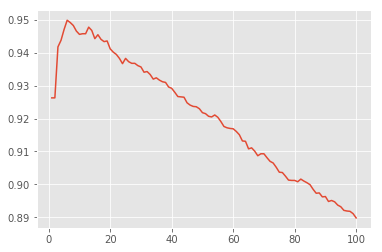

In [46]:
## Calculate accuracy 
accuracy = list()
for k in range(1,k_test+1):
    sim_pred = sum(predictions[k] == emb_test[:,-1])
    accuracy.append((sim_pred/len(emb_test),k))

## Plotting accuracy (y_axis) vs K value (x_axis) curve
acc_k = [val[1] for val in accuracy]
acc_val = [val[0] for val in accuracy]

plt.plot(time_list, acc_val)
plt.show()

In [50]:
idx = int(round(np.sqrt(4707/2)))  # for k = sqrt(n/2)
print("Accuracy at {} = {}".format(idx, accuracy[idx-1][0]))

Accuracy at 49 = 0.923


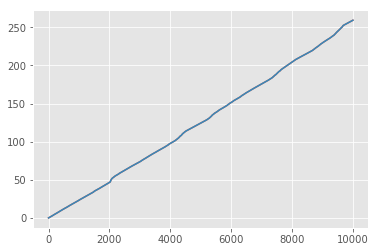

In [49]:
plt.plot(time_list)
plt.show()

# Metric Learning

## With Relevant Examples

In [52]:
## Load relevalant examples
with open("data/Final/relevant_idx_{}_{}".format(emb_dim, emb_type), "rb") as fp:   
    relevant_idx = pickle.load(fp)
    
relevant_idx = [int(i) for i in relevant_idx]
emb_train = emb[relevant_idx]
emb_train.shape

(4707, 197)

In [55]:
X = emb_train[:,:-1]
Y = emb_train[:,-1]

### LMNN

In [56]:
ls = [10, 20, 30, 40, 50, 60,70]
for i in ls:

    # setting up LMNN
    lmnn = metric_learn.LMNN(k=i, learn_rate=1e-2, verbose= True)

    # fit the data
    lmnn.fit(X, Y)

    # transform our input space
    X_lmnn = lmnn.transform()
    
    matrix_m = lmnn.metric()
    np.save('data/Final/matrix_m_{}'.format(i), matrix_m)

/Users/allwynjoseph/anaconda/lib/python3.6/site-packages/metric_learn/lmnn.py:62: UserWarning: use_pca does nothing for the python_LMNN implementation
  warnings.warn('use_pca does nothing for the python_LMNN implementation')


2 806158.5297779104 -403186.48099118273 293854 4.931640625e-06
3 594212.3380995872 -211946.1916783232 324406 4.98095703125e-06
4 577612.8215703573 -16599.516529229935 337845 2.51538330078125e-06
5 577612.8215703573 0.0 337845 5.641125641695638e-22
6 577612.8215703573 0.0 337845 5.697536898112594e-22
7 577612.8215703573 0.0 337845 1.4386280667734302e-22
8 577612.8215703573 0.0 337845 1.4530143474411646e-22
9 577612.8215703573 0.0 337845 1.4675444909155761e-22
10 577612.8215703573 0.0 337845 1.482219935824732e-22
11 577612.8215703573 0.0 337845 1.4970421351829792e-22
12 577612.8215703573 0.0 337845 1.512012556534809e-22
13 577612.8215703573 0.0 337845 1.5271326821001572e-22
14 577612.8215703573 0.0 337845 1.5424040089211587e-22
15 577612.8215703573 0.0 337845 7.789140245051852e-23
16 577612.8215703573 0.0 337845 7.867031647502371e-23
17 577612.8215703573 0.0 337845 7.945701963977395e-23
18 577612.8215703573 0.0 337845 8.025158983617168e-23
19 577612.8215703573 0.0 337845 8.10541057345334

(196, 196)

In [52]:
def eucl_dist_metric(instance, dataset, matrix_m):
    
    temp_inst = instance.reshape(1,-1)
    temp_inst = temp_inst.repeat(len(dataset), axis=0)
    difference = temp_inst - dataset[:,:-1]
    eucl_dist = np.diag(np.sqrt(np.matmul(np.matmul(difference, matrix_m),difference.T)))
    eucl_dist_sorted = [(eucl_dist[i], dataset[i,-1]) for i in range(len(dataset))]
    eucl_dist_sorted.sort()
    
    return eucl_dist_sorted


In [ ]:
"""
## To-Do
- Try the same on the only the MNIST datasets

- Decide on k values
- Calculate distance of each test instance with database and append to list
- Sort in descending order
- Pick the first 'k' values and assign test emb to majority clas
- Calculate the error

"""

def eucl_dist_metric(instance, dataset, matrix_m):
    
    temp_inst = instance.reshape(1,-1)
    temp_inst = temp_inst.repeat(len(dataset), axis=0)
    difference = temp_inst - dataset[:,:-1]
    eucl_dist = np.diag(np.sqrt(np.matmul(np.matmul(difference, matrix_m),difference.T)))
    eucl_dist_sorted = [(eucl_dist[i], dataset[i,-1]) for i in range(len(dataset))]
    eucl_dist_sorted.sort()
    
    return eucl_dist_sorted

ls = [20, 30, 40, 50, 60,70]

for i in ls:
    
    matrix_m = np.load('data/Final/matrix_m_{}.npy'.format(i))
    
    emb_test = emb[60000:]
    k_test = 100
    
    predictions = dict()
    time_list = list()

    for k in range(1,k_test+1) : predictions[k] = list()

    start_time = time.time()
    for n, test_inst in enumerate(emb_test):
        
        ## Calculate the distance of each test instance from train instances 
        eucl_dist_sorted = eucl_dist_metric(test_inst[:-1], emb_train, matrix_m)

        for k in range(1,k_test+1):

            ## Choose first k elements from sorted list 'temp_dist_idx'
            temp_first_k = eucl_dist_sorted[:k]
            temp_labels = [digit[1] for digit in temp_first_k]

            ## Pick label that has majority count and append to prediction list
            temp_list = [temp_labels.count(i) for i in temp_labels]
            predictions[k].append(temp_labels[temp_list.index(max(temp_list))])
    
        time_list.append(round(time.time() - start_time))
        print(n,time_list[-1])
        
    ## Pickling predictions and time values
    path = "data/Final/"
    with open(path + "predictions_knn_strong_metric_{}_{}_{}".format(emb_dim,emb_type,i) + '.pkl', 'wb') as f:
        pickle.dump(predictions, f, pickle.HIGHEST_PROTOCOL)
    with open(path + "time_knn_strong_metric_{}_{}_{}".format(emb_dim,emb_type,i) + '.pkl', 'wb') as f:
        pickle.dump(time_list, f, pickle.HIGHEST_PROTOCOL)

/Users/allwynjoseph/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in sqrt


0 1
1 2
2 3
3 4
4 5
5 5
6 6
7 7
8 8
9 9
10 10
11 10
12 11
13 12
14 13
15 14
16 15
17 16
18 17
19 18
20 19
21 20
22 21
23 22
24 23
25 24
26 25
27 26
28 27
29 27
30 28
31 29
32 31
33 32
34 33
35 34
36 35
37 36
38 37
39 38
40 39
41 40
42 41
43 42
44 43
45 43
46 45
47 45
48 46
49 47
50 48
51 49
52 50
53 50
54 52
55 53
56 54
57 55
58 56
59 57
60 58
61 59
62 60
63 61
64 62
65 63
66 64
67 65
68 66
69 67
70 68
71 69
72 70
73 71
74 72
75 73
76 74
77 75
78 77
79 78
80 79
81 80
82 81
83 82
84 84
85 85
86 86
87 86
88 87
89 88
90 89
91 90
92 91
93 92
94 93
95 94
96 95
97 96
98 97
99 98
100 99
101 100
102 101
103 102
104 103
105 104
106 105
107 106
108 107
109 108
110 108
111 109
112 110
113 111
114 112
115 113
116 114
117 115
118 116
119 117
120 118
121 119
122 120
123 121
124 121
125 123
126 124
127 125
128 125
129 126
130 127
131 128
132 129
133 130
134 131
135 132
136 133
137 134
138 135
139 136
140 137
141 138
142 139
143 140
144 141
145 142
146 143
147 144
148 145
149 146
150 147
151 148
152 1

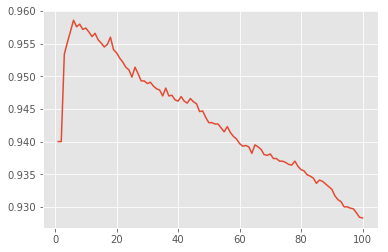

In [84]:
i = 50
name = "data/Final/predictions_knn_strong_metric_{}_{}_{}".format(emb_dim,emb_type,i)
with open(name + '.pkl', 'rb') as f:
    predictions = pickle.load(f)

## Calculate accuracy 
accuracy = list()
for k in range(1,k_test+1):
    sim_pred = sum(predictions[k] == emb_test[:,-1])
    accuracy.append((sim_pred/len(emb_test),k))
    
## Plotting accuracy (y_axis) vs K value (x_axis) curve
acc_k = [val[1] for val in accuracy]
acc_val = [val[0] for val in accuracy]

plt.plot(acc_k, acc_val)
plt.show()

In [85]:
idx = int(round(np.sqrt(4707/2)))  # for k = sqrt(n/2)
print("Accuracy at {} = {}".format(idx, accuracy[idx-1][0]))

Accuracy at 49 = 0.9437


In [ ]:
0.9356 0.9345 0.947 0.9425 0.9437 0.9454 0.9317

### ITML

In [42]:
itml = metric_learn.ITML_Supervised(num_constraints=200)
X_itml = itml.fit_transform(X, Y)

In [43]:
"""
## To-Do
- Try the same on the only the MNIST datasets

- Decide on k values
- Calculate distance of each test instance with database and append to list
- Sort in descending order
- Pick the first 'k' values and assign test emb to majority clas
- Calculate the error

"""
#emb_train = emb[idx[:60000]]
emb_test = emb[60000:61000]
#emb_test = emb_train
k_test = 100
predictions = dict()

for k in range(1,k_test+1) : predictions[k] = list()

for n, test_inst in enumerate(emb_test):
    print(n)
    ## Calculate the distance of each test instance from train instances 
    test_inst = test_inst[:-1]
    test_inst = test_inst.reshape(1,-1)
    test_inst = test_inst.repeat(len(X_itml), axis=0)
    temp_dist = np.linalg.norm((test_inst - X_itml), axis=1)

    ## Store distance and respective labels in tuples in a list
    temp_dist_idx = [(temp_dist[i],emb_train[i,-1]) for i in range(len(X_itml))]
    temp_dist_idx.sort()

    for k in range(1,k_test+1):
    
        ## Choose first k elements from sorted list 'temp_dist_idx'
        temp_first_k = temp_dist_idx[:k]
        temp_labels = [digit[1] for digit in temp_first_k]

        ## Pick label that has majority count and append to prediction list
        temp_list = [temp_labels.count(i) for i in temp_labels]
        predictions[k].append(temp_labels[temp_list.index(max(temp_list))])

#name = "predictions_knn_cnn_metric"
#with open(name + '.pkl', 'wb') as f:
#    pickle.dump(predictions, f, pickle.HIGHEST_PROTOCOL)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

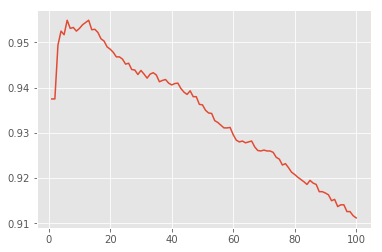

In [56]:
"""
name = "predictions_knn_cnn_metric"
with open(name + '.pkl', 'rb') as f:
    predictions = pickle.load(f)
"""
## Calculate accuracy 
accuracy = list()
for k in range(1,k_test+1):
    sim_pred = sum(predictions[k] == emb_test[:,-1])
    accuracy.append((sim_pred/len(emb_test),k))
    
## Plotting accuracy (y_axis) vs K value (x_axis) curve
acc_k = [val[1] for val in accuracy]
acc_val = [val[0] for val in accuracy]

plt.plot(acc_k, acc_val)
plt.show()

In [57]:
idx = int(round(np.sqrt(5000/2)))  # for k = sqrt(n/2)
print("Accuracy at {} = {}".format(idx, accuracy[idx-1][0]))

Accuracy at 50 = 0.9362
